In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
#Define the global constants nested within the alpha, beta, and gamma constants 

def global_constants(mu_m,B_0,m,v_0,k_B,T,mu_bar, L, w_0, R, rho): 
    return {'magnetic_moment':mu_m, 'magnetic_field':B_0, 'mass': m, 'velocity_particle':v_0, 'Boltzmann_constant':k_B, 'Temperature':T, 'number':mu_bar,'Length': L, 'Bulk_flow_speed':w_0, 'Radius':R, 'Density':rho}




params = global_constants(5.49*10**-23,0.1,1,5,1.38*10**-23,2000,3.902*10**-27,10,3000,1e-8,10)

k_B = params['Boltzmann_constant']
T = params['Temperature']
mu_bar = params['number']
mu_m = params['magnetic_moment']
B_0 = params['magnetic_field']
m = params['mass']
v_0 = params['velocity_particle']
L = params['Length']
w_0 = params['Bulk_flow_speed']
R = params['Radius']
rho= params['Density']



#Formula and derivation for damping constant
def c_T(k_B, T, mu_bar): 

    return np.sqrt(2*k_B*T/mu_bar)

c_T_val = c_T(k_B, T, mu_bar)

def damping_constant(c_T_val, R, rho): 
    return (8*np.sqrt(np.pi)/3)*(R**2)*(rho)*c_T_val 
damp = damping_constant(c_T_val, R, rho)




def alpha(mu_m, B_0, m, v_0): 
    return (mu_m * B_0)/(m*v_0**2)

def beta(damp, v_0, L, m):
    return (damp*L)/(2*m*v_0)

def delta(damp, w_0, L, m, v_0): 
    return (damp*w_0* L)/(m*v_0**2)




In [20]:
alpha_val = alpha(mu_m, B_0, m, v_0)
beta_val = beta(damp, v_0, L, m)
delta_val = delta(damp,w_0,L,m,v_0)


print(damp,alpha_val,beta_val,delta_val)

1.7777454466582323e-11 2.1959999999999998e-25 1.7777454466582323e-11 2.133294535989879e-08


In [21]:
w

# ---------------------------------------------------
# Parameters (you must define these values!)
# ---------------------------------------------------

# forcing function w(t)
def w(t):
    return 1.0   # constant forcing (you can change to sin(t), noise, etc.)

# ---------------------------------------------------
# Initial conditions
# ---------------------------------------------------
t  = 0.0
x  = 1.0
v  = params['velocity_particle']

dt     = 0.1
dt_min = 1e-4

dx_max = 0.001
dx_min = 0.00001
x_tol  = 1e-3

# storage for plotting
ts = []
xs = []


# ---------------------------------------------------
# Derivative function: returns (dx/dt, dv/dt)
# ---------------------------------------------------
def derivs(t, xv):
    x = xv[0]
    v = xv[1]

    fun = -2*beta_val*v - 2*alpha_val*x + 2*alpha_val*x**3 + delta_val * w(t)

    return np.array([v, fun])


# ---------------------------------------------------
# Adaptive RK routine
# ---------------------------------------------------
while t < 15.0:

    xv = np.array([x, v])

    # ---- full RK step ----
    k1 = derivs(t, xv)
    k2 = derivs(t + dt/2, xv + dt*k1/2)
    k3 = derivs(t + dt/2, xv + dt*k2/2)
    k4 = derivs(t + dt,   xv + dt*k3)

    step = xv + dt/6*(k1 + 2*k2 + 2*k3 + k4)
    step_x, step_v = step

    # ---- half step ----
    k2 = derivs(t + dt/4, xv + dt*k1/4)
    k3 = derivs(t + dt/4, xv + dt*k2/4)
    k4 = derivs(t + dt/2, xv + dt*k3/2)

    half = xv + dt/12*(k1 + 2*k2 + 2*k3 + k4)
    half_step_x, half_step_v = half

    # ---- double step ----
    k2 = derivs(t + dt,   xv + dt*k1)
    k3 = derivs(t + dt,   xv + dt*k2)
    k4 = derivs(t + 2*dt, xv + 2*dt*k3)

    dble = xv + dt/3*(k1 + 2*k2 + 2*k3 + k4)
    dble_step_x, dble_step_v = dble

    # -------- Adaptive step size control --------
    if abs(step_x) < x_tol:
        if dt != dt_min:
            print("New step size", dt_min)
        dt = dt_min
        new_x, new_v = step_x, step_v

    else:
        if abs(step_x) > x_tol and abs(step_x - half_step_x)/abs(step_x) > dx_max:
            dt = dt / 2
            print("New step size", dt)
            new_x, new_v = half_step_x, half_step_v

        elif abs(step_x) > x_tol and abs(step_x - dble_step_x)/abs(step_x) < dx_min:
            dt = dt * 2
            print("New step size", dt)
            new_x, new_v = dble_step_x, dble_step_v

        else:
            new_x, new_v = step_x, step_v

    # update variables
    x = new_x
    v = new_v
    t = t + dt

    ts.append(t)
    xs.append(x)

print("Finished")


New step size 0.05
New step size 0.025
New step size 0.0125
New step size 0.00625
New step size 0.003125
New step size 0.0015625
New step size 0.00078125
New step size 0.000390625
Finished


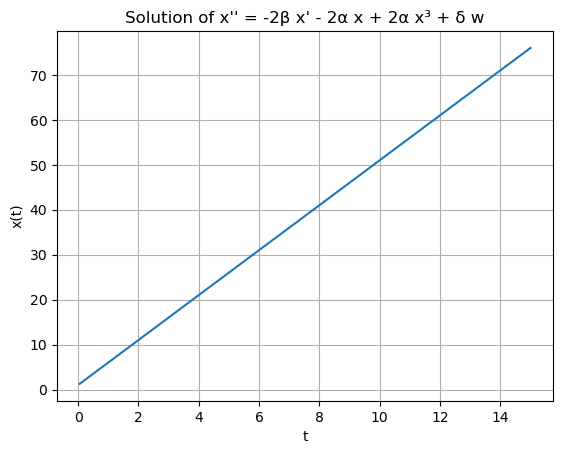

In [22]:
plt.plot(ts, xs)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solution of x'' = -2β x' - 2α x + 2α x³ + δ w")
plt.grid()
plt.show()
